### 逻辑回归实现
#### 主要使用的是sklearn 的 linear_model 模块中的LogisticRegression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve

#### 读取数据

In [6]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Z-score 标准化

In [8]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"], axis=1),),
                                    columns=['Pregnancies', 'Glucose', 'BloodPressure',
                                             'SkinThickness', 'Insulin', 'BMI', 
                                             'DiabetesPedigreeFunction', 'Age'])
y = data.Outcome

#### 划分训练集

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

#### 逻辑回归

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('逻辑回归在测试集中分类的精确率：{}\n'.format(logreg.score(X_test, y_test)))

逻辑回归在测试集中分类的精确率：0.8116883116883117



#### 混淆矩阵

In [11]:
confusion_matrix(y_test, y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Predicted    0   1  All
True                   
0           96   9  105
1           20  29   49
All        116  38  154


### 绘制ROC曲线

#### 工作特征曲线 ROC曲线，是比较两个分类模型好坏的可视化工具

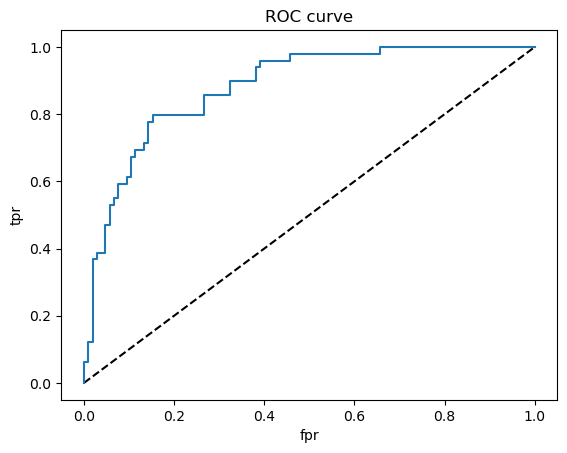

In [14]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

#### 使用sklearn 的metrics模块中的roc_auc_score,计算ROC曲线下的面积

In [15]:
from sklearn.metrics import roc_auc_score
print("ROC Accuracy: {}".format(roc_auc_score(y_test, y_pred_proba)))

ROC Accuracy: 0.8812439261418853
